In [154]:
# %%
import datetime
import json
import re
import math

import pandas as pd
import seaborn as sns
import qrQuery
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import machineLearningUtilities.dataPreparation as mlU
from machineLearningUtilities import modelPerformance as mP
from machineLearningUtilities import nnUtils as nnU

In [155]:
# Paths and filenames
tablesPath = '../Feature Tables'
tableFolder = 'DF Feb 18 12_02_10'
ext = '.xlsx'
fullTablePath = '/'.join([tablesPath, tableFolder, tableFolder+ext])
# Read the table and drop nan values
df = pd.read_excel(fullTablePath)
df.dropna(inplace=True)

In [156]:
# Check if any data is missing
df.isnull().sum()

agl           0
nBlobs        0
totalArea     0
fullBlobs     0
bigBlobs      0
medBlobs      0
smallBlobs    0
_id           0
diagnostic    0
dtype: int64

In [157]:
#%% Describe the df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
agl,3152.0,5.056829,3.766860,0.0,2.291288,3.960745,6.495191,23.647146
nBlobs,3152.0,3.594860,1.307843,0.0,3.000000,4.000000,4.000000,7.000000
totalArea,3152.0,26.174967,20.640382,0.0,8.828671,23.645105,39.248252,107.430070
fullBlobs,3152.0,0.239213,0.605076,0.0,0.000000,0.000000,0.000000,4.000000
bigBlobs,3152.0,0.455584,0.767017,0.0,0.000000,0.000000,1.000000,4.000000
medBlobs,3152.0,1.292830,1.207287,0.0,0.000000,1.000000,2.000000,4.000000
smallBlobs,3152.0,1.607234,1.518923,0.0,0.000000,1.000000,3.000000,7.000000
diagnostic,3152.0,0.501904,0.500076,0.0,0.000000,1.000000,1.000000,1.000000


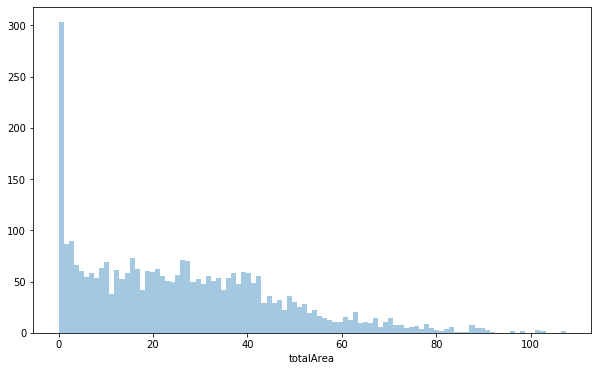

In [158]:
plt.figure(figsize=(10,6))
sns.distplot(df['totalArea'], kde=False, bins=100)

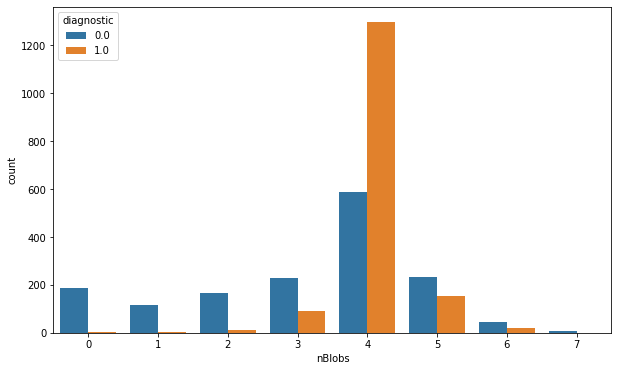

In [159]:
plt.figure(figsize=(10,6))
sns.countplot(df['nBlobs'], hue=df['diagnostic'])

In [160]:
# Linear correlations between my features
df.corr()['diagnostic'].sort_values()

smallBlobs   -0.373792
agl           0.268944
fullBlobs     0.312096
nBlobs        0.335755
medBlobs      0.367301
bigBlobs      0.488381
totalArea     0.648234
diagnostic    1.000000
Name: diagnostic, dtype: float64

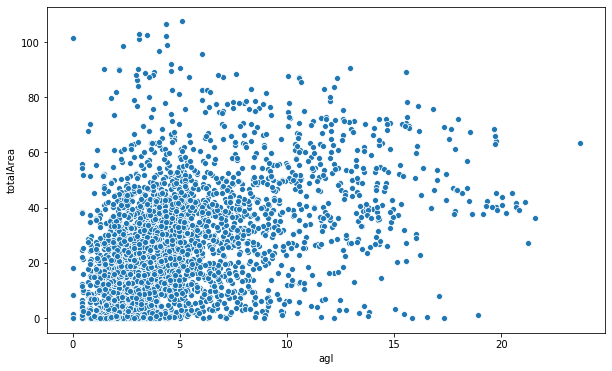

In [161]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='agl', y='totalArea', data=df)

In [162]:
df.sort_values('nBlobs', ascending=False).head(5)

,agl,nBlobs,totalArea,fullBlobs,bigBlobs,medBlobs,smallBlobs,_id,diagnostic
1859,2.958040,7,10.402098,0,0,0,7,59b97a0118c5bb4b940f0667,0.0
2783,4.322904,7,10.664336,0,0,1,6,59b979a018c5bb4b940f035b,0.0
1743,3.741657,7,10.402098,0,0,0,7,599b33f918c5bb80e4b2d822,0.0
2079,2.179449,7,11.975524,0,0,1,6,599b19f818c5bb80e4b2c85e,0.0
742,3.897114,7,8.741259,0,0,0,7,599b340618c5bb80e4b2d83a,0.0


In [163]:
len(df)*.015

47.28

In [164]:
non_top_1_perc = df.sort_values('totalArea', ascending=False).iloc[47:]

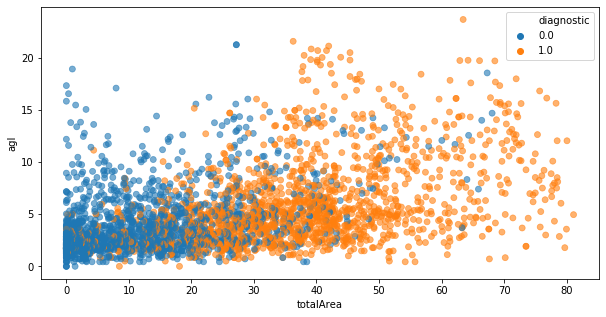

In [165]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='totalArea', y='agl', data=non_top_1_perc, hue='diagnostic', edgecolor=None, alpha=.6)

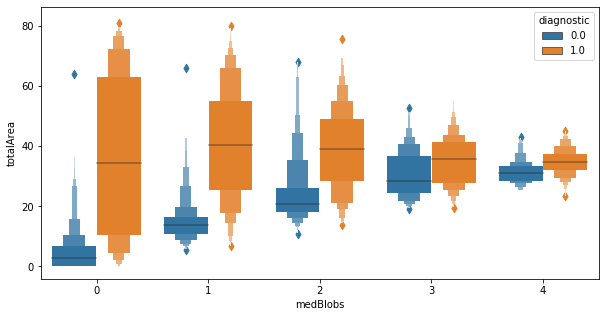

In [166]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='medBlobs', y='totalArea', data=non_top_1_perc, hue='diagnostic')

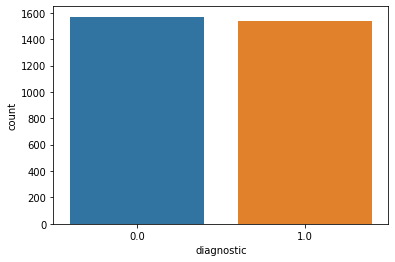

In [167]:
sns.countplot(x='diagnostic', data=non_top_1_perc)

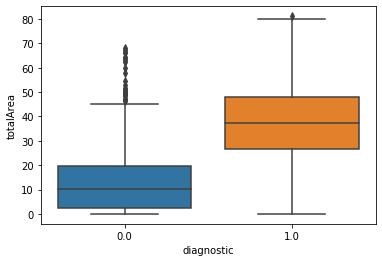

In [168]:
sns.boxplot(x='diagnostic', y='totalArea', data=non_top_1_perc)

In [169]:
# Describe boxplot
non_top_1_perc.groupby('diagnostic')['totalArea'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnostic,,,,,,,,
0.0,1570.0,12.746259,12.183424,0.0,2.447552,10.052448,19.580420,68.094406
1.0,1535.0,37.954602,16.535984,0.0,26.529720,37.237762,48.164336,81.118881


In [170]:
# Do a negative and positive analysis
negatives = df[df['diagnostic'] == 0]
positives = df[df['diagnostic'] == 1]

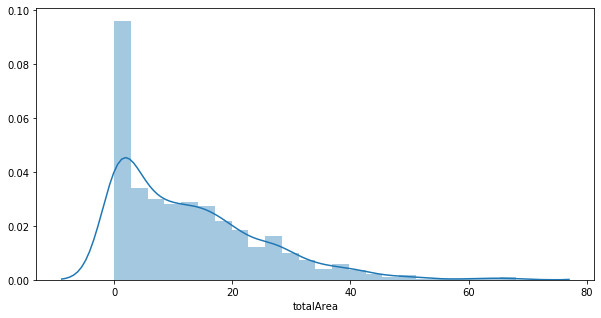

In [171]:
plt.figure(figsize=(10,5))
sns.distplot(negatives['totalArea'])

In [172]:
lenOf95Percent = int(len(negatives)*.05)
negatives95Percent = negatives.sort_values('totalArea', ascending=False).iloc[lenOf95Percent:]

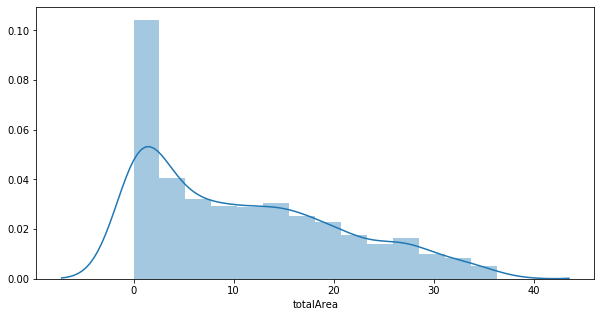

In [173]:
# Out of outliers negatives in totalArea
plt.figure(figsize=(10,5))
sns.distplot(negatives95Percent['totalArea'])

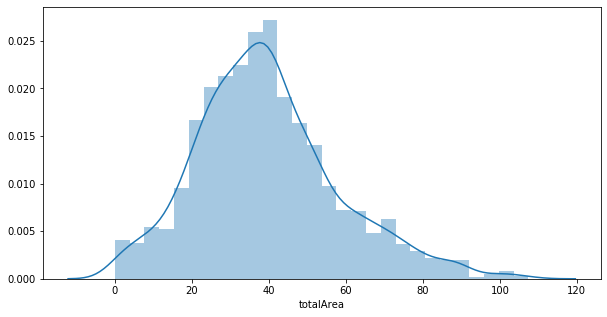

In [174]:
plt.figure(figsize=(10,5))
sns.distplot(positives['totalArea'])

In [175]:
#Dropping the outlier rows with Percentiles
upper_lim = positives['totalArea'].quantile(.95)
lower_lim = positives['totalArea'].quantile(.05)
positives94Percent = positives[(positives['totalArea'] < upper_lim) & (positives['totalArea'] > lower_lim)]

,agl,nBlobs,totalArea,fullBlobs,bigBlobs,medBlobs,smallBlobs,diagnostic
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.0
mean,6.190299,4.067558,38.819985,0.320901,0.860662,1.911330,0.974666,1.0
std,4.133697,0.454643,14.104692,0.568956,0.903986,1.087971,1.125595,0.0
min,0.000000,1.000000,11.188811,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.269174,4.000000,28.146853,0.000000,0.000000,1.000000,0.000000,1.0
50%,5.024938,4.000000,37.674825,0.000000,1.000000,2.000000,1.000000,1.0
75%,7.968689,4.000000,47.902098,1.000000,1.000000,3.000000,2.000000,1.0
max,23.647146,6.000000,74.650350,3.000000,4.000000,4.000000,6.000000,1.0


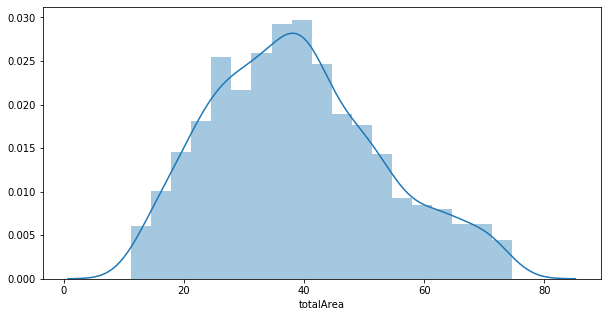

In [176]:
# Out of outliers positives in totalArea
plt.figure(figsize=(10,5))
sns.distplot(positives94Percent['totalArea'])
positives94Percent.describe()

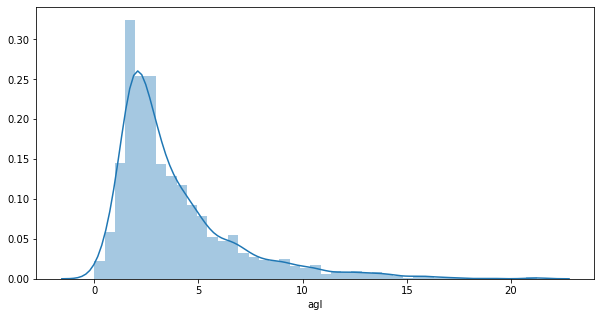

In [177]:
plt.figure(figsize=(10,5))
sns.distplot(negatives95Percent['agl'])

In [178]:
# Describe hist
negatives95Percent.groupby('diagnostic')['agl'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnostic,,,,,,,,
0.0,1492.0,3.857131,2.92801,0.0,1.920286,2.915476,4.781107,21.229402


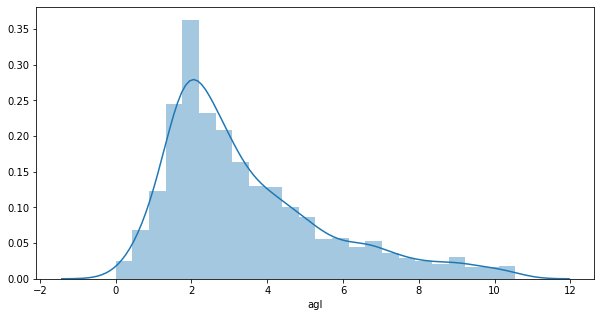

In [179]:
lenOf96Percent = int(len(negatives)*.04)
negatives91Percent = negatives95Percent.sort_values('agl', ascending=False).iloc[lenOf96Percent:]
# Out of outliers negatives in agl
plt.figure(figsize=(10,5))
sns.distplot(negatives91Percent['agl'])

In [180]:
fullCleanDf = pd.concat([negatives93Percent, positives97Percent])

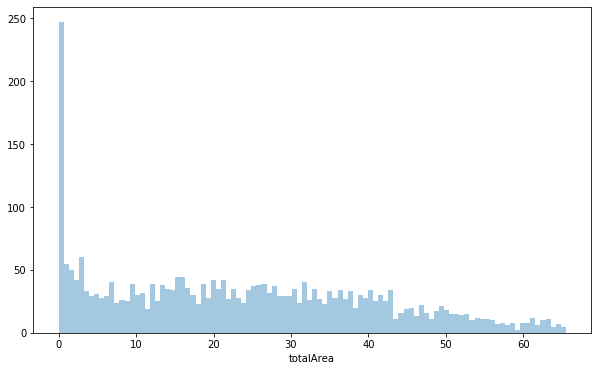

In [181]:
plt.figure(figsize=(10,6))
sns.distplot(fullCleanDf['totalArea'], kde=False, bins=100)

In [291]:
# A lot of points are 0, to reduce this skewness, take the log of totalArea
fullCleanDf['logTA']  = (fullCleanDf['totalArea'] + 1).transform(np.log)

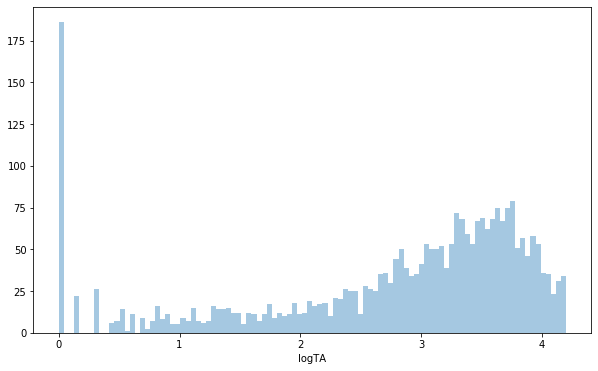

In [292]:
plt.figure(figsize=(10,6))
sns.distplot(fullCleanDf['logTA'], kde=False, bins=100)

In [296]:
fullCleanDf['binTA'] = pd.cut(fullCleanDf['logTA'], bins=[1,2,3,4], labels=["Low", 'Mid', "High"])
fullCleanDf = pd.get_dummies(fullCleanDf)

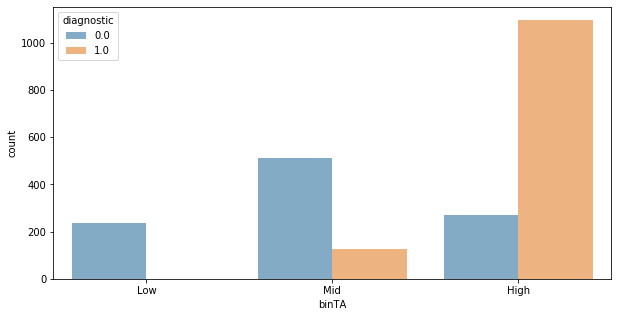

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(x='binTA', data=fullCleanDf, hue='diagnostic', edgecolor=None, alpha=.6)

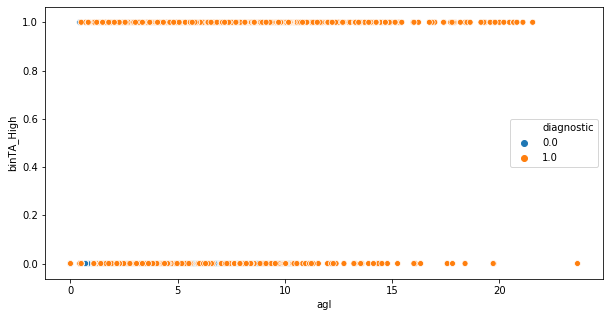

In [303]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='agl', y='binTA_High', data=fullCleanDf, hue='diagnostic')

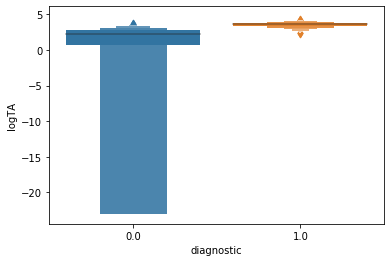

In [210]:
sns.boxenplot(x='diagnostic', y='logTA', data=fullCleanDf)

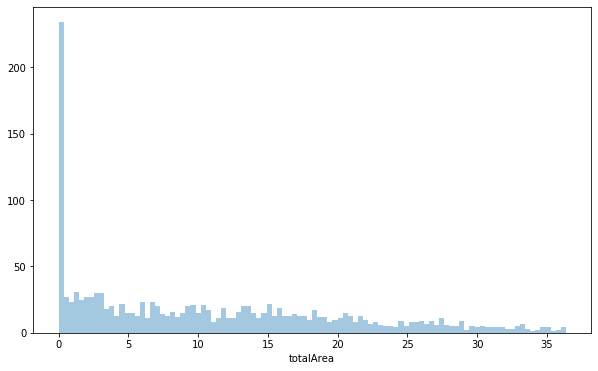

In [220]:
plt.figure(figsize=(10,6))
sns.distplot(fullCleanDf[fullCleanDf['diagnostic'] == 0]['totalArea'], kde=False, bins=100)

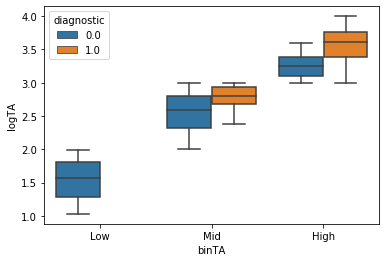

In [279]:
sns.boxplot(x="binTA", y="logTA", hue='diagnostic', data=fullCleanDf);

In [251]:
fullCleanDf.corr()

,diagnostic,agl,nBlobs,totalArea,fullBlobs,bigBlobs,medBlobs,smallBlobs,logTA
diagnostic,1.000000,0.369228,0.356073,0.763753,0.331949,0.524368,0.486263,-0.411122,0.362993
agl,0.369228,1.000000,0.206941,0.478977,0.614089,0.214540,0.062606,-0.117391,0.249650
nBlobs,0.356073,0.206941,1.000000,0.490876,0.111074,0.199655,0.416397,0.437828,0.770538
totalArea,0.763753,0.478977,0.490876,1.000000,0.531536,0.674494,0.555065,-0.467467,0.494955
fullBlobs,0.331949,0.614089,0.111074,0.531536,1.000000,0.103470,0.008327,-0.196906,0.148413
bigBlobs,0.524368,0.214540,0.199655,0.674494,0.103470,1.000000,0.050654,-0.381697,0.227976
medBlobs,0.486263,0.062606,0.416397,0.555065,0.008327,0.050654,1.000000,-0.459064,0.392679
smallBlobs,-0.411122,-0.117391,0.437828,-0.467467,-0.196906,-0.381697,-0.459064,1.000000,0.227700
logTA,0.362993,0.249650,0.770538,0.494955,0.148413,0.227976,0.392679,0.227700,1.000000


In [298]:
#fullCleanDf.drop('binTA', inplace=True, axis=1)
fullCleanDf= fullCleanDf.set_index('diagnostic').reset_index()
fullCleanDf.head()
fullCleanDf.drop('binTA_Mid', inplace=True, axis=1)
fullCleanDf.drop('totalArea', inplace=True, axis=1)
fullCleanDf.drop('logTA', inplace=True, axis=1)

In [299]:
# %% Save it
# Paths and filenames
cleanTableFolder = tableFolder+'_clean'
fullTablePath = '/'.join([tablesPath, tableFolder, cleanTableFolder+ext])
fullCleanDf.to_excel(fullTablePath, index=False)